In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from cobra.io import read_sbml_model
model = read_sbml_model('iML1515.xml.gz')
model

Name,iML1515
Memory address,0x02ed55f4e908
Number of metabolites,1877
Number of reactions,2712
Number of groups,0
Objective expression,1.0*BIOMASS_Ec_iML1515_core_75p37M - 1.0*BIOMASS_Ec_iML1515_core_75p37M_reverse_35685
Compartments,"cytosol, extracellular space, periplasm"


In [4]:
model_sucd= model.copy()
model_sucd

Name,iML1515
Memory address,0x02ed2387a278
Number of metabolites,1877
Number of reactions,2712
Number of groups,0
Objective expression,1.0*BIOMASS_Ec_iML1515_core_75p37M - 1.0*BIOMASS_Ec_iML1515_core_75p37M_reverse_35685
Compartments,"cytosol, extracellular space, periplasm"


In [5]:
from cobra import Reaction, Metabolite
sucd = Reaction('SUCD') #CoA-dependent succinate semialdehyde dehydrogenase
succinyl_semialdehyde = Metabolite(id='succinyl_semialdehyde_c', compartment='c')

sucd.add_metabolites({model_sucd.metabolites.h_c: 1,
                              model_sucd.metabolites.nadh_c: -1,
                              model_sucd.metabolites.succoa_c: -1,
                              succinyl_semialdehyde: 1, #new one
                              model_sucd.metabolites.coa_c: 1,
                              model_sucd.metabolites.nad_c: 1
                             })
print(sucd.build_reaction_string())
model_sucd.add_reactions([sucd])
model_sucd.reactions.SUCD

nadh_c + succoa_c --> coa_c + h_c + nad_c + succinyl_semialdehyde_c


Reaction identifier,SUCD
Name,
Memory address,0x02ed61408ef0
Stoichiometry,nadh_c + succoa_c --> coa_c + h_c + nad_c + succinyl_semialdehyde_c Nicotinamide adenine dinucleotide - reduced + Succinyl-CoA --> Coenzyme A + H+ + Nicotinamide adenine dinucleotide +
GPR,
Lower bound,0.0
Upper bound,1000.0


In [6]:
from cobra import Reaction, Metabolite
fhbd = Reaction('FHBD') #4-hydroxybutyrate dehydrogenase
four_hydroxybutyrate = Metabolite(id='four_hydroxybutyrate_c', compartment='c')

fhbd.add_metabolites({model_sucd.metabolites.h_c: 1,
                              model_sucd.metabolites.nadh_c: -1,
                              succinyl_semialdehyde: -1, 
                              four_hydroxybutyrate: 1, #new one
                              model_sucd.metabolites.nad_c: 1
                             })
print(fhbd.build_reaction_string())
model_sucd.add_reactions([fhbd])
model_sucd.reactions.FHBD

nadh_c + succinyl_semialdehyde_c --> four_hydroxybutyrate_c + h_c + nad_c


Reaction identifier,FHBD
Name,
Memory address,0x02ed61408d30
Stoichiometry,nadh_c + succinyl_semialdehyde_c --> four_hydroxybutyrate_c + h_c + nad_c Nicotinamide adenine dinucleotide - reduced + --> + H+ + Nicotinamide adenine dinucleotide
GPR,
Lower bound,0.0
Upper bound,1000.0


In [7]:
from cobra import Reaction, Metabolite
hbd_coa_t = Reaction('HBCT') #4-hydroxybutyryl-CoA transferase
four_hbcoa = Metabolite(id='four_hbcoa_c', compartment='c')
hbd_coa_t.add_metabolites({model_sucd.metabolites.accoa_c: -1,
                              model_sucd.metabolites.ac_c: 1,
                              four_hbcoa: 1, #new one
                              four_hydroxybutyrate: -1
                             })
print(hbd_coa_t.build_reaction_string())
model_sucd.add_reactions([hbd_coa_t])
model_sucd.reactions.HBCT

accoa_c + four_hydroxybutyrate_c --> ac_c + four_hbcoa_c


Reaction identifier,HBCT
Name,
Memory address,0x02ed6170d5c0
Stoichiometry,accoa_c + four_hydroxybutyrate_c --> ac_c + four_hbcoa_c Acetyl-CoA + --> Acetate +
GPR,
Lower bound,0.0
Upper bound,1000.0


In [8]:
from cobra import Reaction, Metabolite
hbd_coa_r = Reaction('HBCR') #4-hydroxybutyryl-CoA reductase
four_hbaldehyde = Metabolite(id='four_hbaldehyde_c', compartment='c')
hbd_coa_r.add_metabolites({model_sucd.metabolites.h_c: 1,
                              model_sucd.metabolites.nadh_c: -1,
                              four_hbaldehyde: 1, #new one
                              four_hbcoa: -1,
                              model_sucd.metabolites.nad_c: 1,
                              model_sucd.metabolites.coa_c: 1
                             })
print(hbd_coa_r.build_reaction_string())
model_sucd.add_reactions([hbd_coa_r])
model_sucd.reactions.HBCR

four_hbcoa_c + nadh_c --> coa_c + four_hbaldehyde_c + h_c + nad_c


Reaction identifier,HBCR
Name,
Memory address,0x02ed6170ddd8
Stoichiometry,four_hbcoa_c + nadh_c --> coa_c + four_hbaldehyde_c + h_c + nad_c + Nicotinamide adenine dinucleotide - reduced --> Coenzyme A + + H+ + Nicotinamide adenine dinucleotide
GPR,
Lower bound,0.0
Upper bound,1000.0


In [9]:
from cobra import Reaction, Metabolite
adh= Reaction('ADH') #alcohol dehydrogenase
bdo = Metabolite(id='bdo_c', compartment='c')
adh.add_metabolites({model_sucd.metabolites.h_c: 1,
                              model_sucd.metabolites.nadh_c: -1,
                              four_hbaldehyde: -1,
                              bdo: 1, #new one
                              model_sucd.metabolites.nad_c: 1,
                             })
print(adh.build_reaction_string())
model_sucd.add_reactions([adh])
model_sucd.reactions.ADH

four_hbaldehyde_c + nadh_c --> bdo_c + h_c + nad_c


Reaction identifier,ADH
Name,
Memory address,0x02ed6171e128
Stoichiometry,four_hbaldehyde_c + nadh_c --> bdo_c + h_c + nad_c + Nicotinamide adenine dinucleotide - reduced --> + H+ + Nicotinamide adenine dinucleotide
GPR,
Lower bound,0.0
Upper bound,1000.0


In [10]:
bdo_exchange = Reaction('EX_bdo')
bdo_exchange.add_metabolites({model_sucd.metabolites.bdo_c: -1})
model_sucd.add_reaction(bdo_exchange)
model_sucd.add_boundary(model_sucd.metabolites.bdo_c, type='demand')

Reaction identifier,DM_bdo_c
Name,demand
Memory address,0x02ed614084a8
Stoichiometry,bdo_c --> -->
GPR,
Lower bound,0
Upper bound,1000.0


In [11]:
with model:
    model_sucd.objective=model_sucd.reactions.ADH
    optimized = float(model_sucd.optimize().objective_value)
    print(optimized)

9.605894736842117


In [12]:
uptake = model_sucd.reactions.EX_glc__D_e.flux #uptake <--
print(uptake)

-10.0


In [13]:
Models_yield = dict()
Models_yield['sucd']= optimized

In [14]:
print("Yield for model SucD =",(-1)*((Models_yield['sucd'])/uptake)) # Yield for Model_SucD (Succinate) p-mmol/gl-mmol
#it is multiplied by -1 because the reaction is an uptake which means thats goes for the right to the left

Yield for model SucD = 0.9605894736842118


In [15]:
model_akg=model.copy()
model_akg

Name,iML1515
Memory address,0x02ed2387ff98
Number of metabolites,1877
Number of reactions,2712
Number of groups,0
Objective expression,1.0*BIOMASS_Ec_iML1515_core_75p37M - 1.0*BIOMASS_Ec_iML1515_core_75p37M_reverse_35685
Compartments,"cytosol, extracellular space, periplasm"


In [16]:
from cobra import Reaction, Metabolite
oxodc = Reaction('OXODC') #2-oxoglutarate decarboxylase
succinyl_semialdehyde = Metabolite(id='succinyl_semialdehyde_c', compartment='c')

oxodc.add_metabolites({model_akg.metabolites.akg_c: -1,
                              succinyl_semialdehyde: 1, #new one
                              model_akg.metabolites.co2_c: 1
                             })
print(oxodc.build_reaction_string())
model_akg.add_reactions([oxodc])
model_akg.reactions.OXODC

akg_c --> co2_c + succinyl_semialdehyde_c


Reaction identifier,OXODC
Name,
Memory address,0x02ed620bffd0
Stoichiometry,akg_c --> co2_c + succinyl_semialdehyde_c 2-Oxoglutarate --> CO2 CO2 +
GPR,
Lower bound,0.0
Upper bound,1000.0


In [17]:
from cobra import Reaction, Metabolite
fhbd = Reaction('FHBD') #4-hydroxybutyrate dehydrogenase
four_hydroxybutyrate = Metabolite(id='four_hydroxybutyrate_c', compartment='c')

fhbd.add_metabolites({model_akg.metabolites.h_c: 1,
                              model_akg.metabolites.nadh_c: -1,
                              succinyl_semialdehyde: -1, 
                              four_hydroxybutyrate: 1, #new one
                              model_akg.metabolites.nad_c: 1
                             })
print(fhbd.build_reaction_string())
model_akg.add_reactions([fhbd])
model_akg.reactions.FHBD

nadh_c + succinyl_semialdehyde_c --> four_hydroxybutyrate_c + h_c + nad_c


Reaction identifier,FHBD
Name,
Memory address,0x02ed623e77f0
Stoichiometry,nadh_c + succinyl_semialdehyde_c --> four_hydroxybutyrate_c + h_c + nad_c Nicotinamide adenine dinucleotide - reduced + --> + H+ + Nicotinamide adenine dinucleotide
GPR,
Lower bound,0.0
Upper bound,1000.0


In [18]:
from cobra import Reaction, Metabolite
hbd_coa_t = Reaction('HBCT') #4-hydroxybutyryl-CoA transferase
four_hbcoa = Metabolite(id='four_hbcoa_c', compartment='c')
hbd_coa_t.add_metabolites({model_akg.metabolites.accoa_c: -1,
                              model_akg.metabolites.ac_c: 1,
                              four_hbcoa: 1, #new one
                              four_hydroxybutyrate: -1
                             })
print(hbd_coa_t.build_reaction_string())
model_akg.add_reactions([hbd_coa_t])
model_akg.reactions.HBCT

accoa_c + four_hydroxybutyrate_c --> ac_c + four_hbcoa_c


Reaction identifier,HBCT
Name,
Memory address,0x02ed623e7c18
Stoichiometry,accoa_c + four_hydroxybutyrate_c --> ac_c + four_hbcoa_c Acetyl-CoA + --> Acetate +
GPR,
Lower bound,0.0
Upper bound,1000.0


In [19]:
from cobra import Reaction, Metabolite
hbd_coa_r = Reaction('HBCR') #4-hydroxybutyryl-CoA reductase
four_hbaldehyde = Metabolite(id='four_hbaldehyde_c', compartment='c')
hbd_coa_r.add_metabolites({model_akg.metabolites.h_c: 1,
                              model_akg.metabolites.nadh_c: -1,
                              four_hbaldehyde: 1, #new one
                              four_hbcoa: -1,
                              model_akg.metabolites.nad_c: 1,
                              model_akg.metabolites.coa_c: 1
                             })
print(hbd_coa_r.build_reaction_string())
model_akg.add_reactions([hbd_coa_r])
model_akg.reactions.HBCR

four_hbcoa_c + nadh_c --> coa_c + four_hbaldehyde_c + h_c + nad_c


Reaction identifier,HBCR
Name,
Memory address,0x02ed620d3550
Stoichiometry,four_hbcoa_c + nadh_c --> coa_c + four_hbaldehyde_c + h_c + nad_c + Nicotinamide adenine dinucleotide - reduced --> Coenzyme A + + H+ + Nicotinamide adenine dinucleotide
GPR,
Lower bound,0.0
Upper bound,1000.0


In [20]:
from cobra import Reaction, Metabolite
adh= Reaction('ADH') #alcohol dehydrogenase
bdo = Metabolite(id='bdo_c', compartment='c')
adh.add_metabolites({model_akg.metabolites.h_c: 1,
                              model_akg.metabolites.nadh_c: -1,
                              four_hbaldehyde: -1,
                              bdo: 1, #new one
                              model_akg.metabolites.nad_c: 1,
                             })
print(adh.build_reaction_string())
model_akg.add_reactions([adh])
model_akg.reactions.ADH

four_hbaldehyde_c + nadh_c --> bdo_c + h_c + nad_c


Reaction identifier,ADH
Name,
Memory address,0x02ed620d35c0
Stoichiometry,four_hbaldehyde_c + nadh_c --> bdo_c + h_c + nad_c + Nicotinamide adenine dinucleotide - reduced --> + H+ + Nicotinamide adenine dinucleotide
GPR,
Lower bound,0.0
Upper bound,1000.0


In [21]:
bdo_exchange = Reaction('EX_bdo')
bdo_exchange.add_metabolites({model_akg.metabolites.bdo_c: -1})
model_akg.add_reaction(bdo_exchange)
model_akg.add_boundary(model_akg.metabolites.bdo_c, type='demand')

Reaction identifier,DM_bdo_c
Name,demand
Memory address,0x02ed620d3048
Stoichiometry,bdo_c --> -->
GPR,
Lower bound,0
Upper bound,1000.0


In [22]:
with model:
    model_akg.objective=model_akg.reactions.ADH
    optimized = float(model_akg.optimize().objective_value)
    print(optimized)

9.708085106382981


In [23]:
uptake_akg = model_akg.reactions.EX_glc__D_e.flux #uptake <--
print(uptake_akg)

-10.0


In [24]:
Models_yield['akg']= optimized

In [25]:
print("Yield for model Akg =",(-1)*((Models_yield['akg'])/uptake)) # Yield for Model_akg (a-ketoglutarate) p-mmol/gl-mmol
#it is multiplied by -1 because the reaction is an uptake which means thats goes for the right to the left

Yield for model Akg = 0.9708085106382981


In [29]:
from cameo import models
#from cameo.visualization.plotting.with_plotly import PlotlyPlotter
from cameo.strain_design.deterministic.flux_variability_based import FSEOF
fseof = FSEOF(model_sucd)
result_sucd=fseof.run(target=model_sucd.reactions.EX_bdo)
result_sucd

,1,2,3,4,5,6,7,8,9,10
PTAr,-9.605895,-9.605895,-9.605895,-9.605895,-9.605895,-9.605895,-9.605895,-9.605895,-9.605895,-9.605895
ACKr,9.605895,9.605895,9.605895,9.605895,9.605895,9.605895,9.605895,9.605895,9.605895,9.605895
ENO,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
PGI,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
PGK,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000
MDH,10.394105,10.394105,10.394105,10.394105,10.394105,10.394105,10.394105,10.394105,10.394105,10.394105
FUM,0.788211,0.788211,0.788211,0.788211,0.788211,0.788211,0.788211,0.788211,0.788211,0.788211
ICL,9.605895,9.605895,9.605895,9.605895,9.605895,9.605895,9.605895,9.605895,9.605895,9.605895
DHAPT,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
F6PA,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


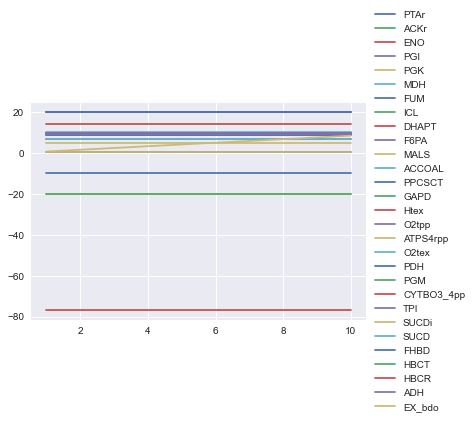

In [30]:
from matplotlib import pyplot as plt
plt.style.use('seaborn')
%matplotlib inline
result_sucd.data_frame[:].T.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.savefig("figures/FSEOF_akg.png")
plt.show()

In [27]:
from cameo import models
from cameo.visualization.plotting.with_plotly import PlotlyPlotter
from cameo.strain_design.deterministic.flux_variability_based import FSEOF
fseof = FSEOF(model_akg)
result_akg=fseof.run(target=model_akg.reactions.EX_bdo)
result_akg

,1,2,3,4,5,6,7,8,9,10
CS,10.291915,10.291915,10.291915,10.291915,10.291915,10.291915,10.291915,10.291915,10.291915,10.291915
ICDHyr,10.291915,10.291915,10.291915,10.291915,10.291915,10.291915,10.291915,10.291915,10.291915,10.291915
FBA,9.708085,9.708085,9.708085,9.708085,9.708085,9.708085,9.708085,9.708085,9.708085,9.708085
FUM,0.583830,0.583830,0.583830,0.583830,0.583830,0.583830,0.583830,0.583830,0.583830,0.583830
PPC,9.708085,9.708085,9.708085,9.708085,9.708085,9.708085,9.708085,9.708085,9.708085,9.708085
NADTRHD,10.291915,10.291915,10.291915,10.291915,10.291915,10.291915,10.291915,10.291915,10.291915,10.291915
AKGDH,0.583830,0.583830,0.583830,0.583830,0.583830,0.583830,0.583830,0.583830,0.583830,0.583830
Htex,-67.956596,-67.956596,-67.956596,-67.956596,-67.956596,-67.956596,-67.956596,-67.956596,-67.956596,-67.956596
O2tpp,6.605532,6.605532,6.605532,6.605532,6.605532,6.605532,6.605532,6.605532,6.605532,6.605532
CO2tpp,-21.167660,-21.167660,-21.167660,-21.167660,-21.167660,-21.167660,-21.167660,-21.167660,-21.167660,-21.167660


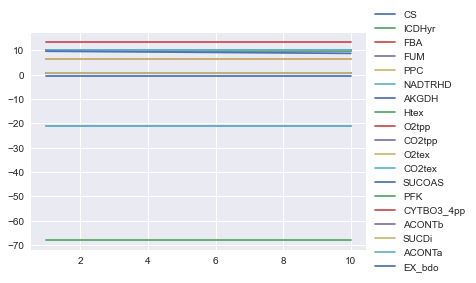

In [28]:
#import matplot lib for ploting and sk learn for calculating the slope

from matplotlib import pyplot as plt
plt.style.use('seaborn')
%matplotlib inline
result_akg.data_frame[:].T.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.savefig("figures/FSEOF_akg.png")
plt.show()